In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
GrcDf = pd.read_csv("../K1_mi10_GRC.csv")
GrcDf.head()

,Erm/Sci,Scm/Po,conf,strain
0,39.76,0.1,100,0.0
1,39.76,0.1,90,0.0
2,39.76,0.1,80,0.0
3,39.76,0.1,70,0.0
4,39.76,0.1,60,0.0


In [6]:
x = GrcDf[['Erm/Sci','Scm/Po','conf']].values
y = GrcDf[['strain']].values

In [7]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (352, 3) (352, 1)
Test set: (88, 3) (88, 1)


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

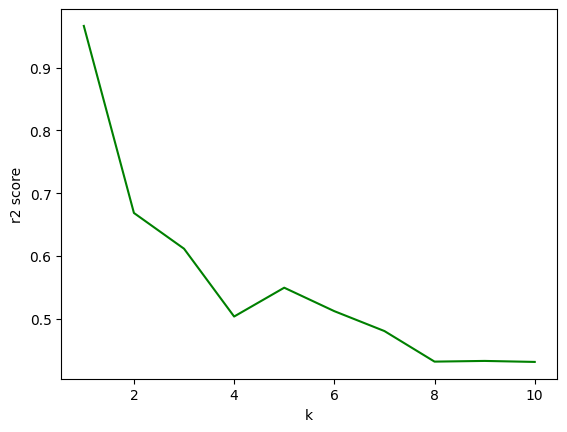

In [9]:
from sklearn.neighbors import KNeighborsRegressor
k=1
r2atk= np.zeros(10)
maek = np.zeros(10)
msek = np.zeros(10)

for k in range(1,11):
    knn_regk = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn_regk.fit(X_train, y_train)
    yhat = knn_regk.predict(X_test)
    r2atk[k-1]=r2_score(y_test, yhat)
    maek[k-1] = mean_absolute_error(y_test, yhat)
    msek[k-1] = mean_squared_error(y_test, yhat)

plt.plot(range(1,11), r2atk, 'g')
plt.xlabel('k')
plt.ylabel('r2 score')
plt.show()


In [ ]:
plt.plot(range(1,11), maek, 'g')
plt.xlabel('k')
plt.ylabel('maek')
plt.show()

In [ ]:
print("R^2 score for k=3:", r2atk[1])
print("MAE score for k=3:", maek[1])
print("MSE score for k=3:", msek[1])

In [ ]:
k=1    
knn_regk = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
knn_regk.fit(X_train, y_train)
yhat = knn_regk.predict(X_test)
r2atk[k-1]=r2_score(y_test,yhat)
maek[k-1] = mean_absolute_error(y_test, yhat)
msek[k-1] = mean_squared_error(y_test, yhat)

plt.scatter(y_test, yhat)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()